In [2]:
import pandas as pd

data = {
    "text": [
        "I enjoy spending time alone reading books and thinking deeply",
        "I prefer quiet environments and avoid large social gatherings",
        "I feel drained after social interactions",
        "I like working independently rather than in groups",
        "I express myself better in writing than speaking",
        "I love meeting new people and making friends easily",
        "I enjoy parties and social events",
        "I feel energized when surrounded by people",
        "I like being the center of attention",
        "I enjoy teamwork and group discussions",
        "I often feel anxious and worry about small things",
        "I get stressed easily in difficult situations",
        "I overthink a lot and feel emotionally sensitive",
        "I feel nervous when things go wrong",
        "I panic under pressure",
        "I remain calm even in stressful situations",
        "I handle pressure very well",
        "I stay relaxed during exams and challenges",
        "I am emotionally balanced and composed",
        "I rarely feel anxious or overwhelmed",
        "I like planning things carefully before acting",
        "I am organized and disciplined in my work",
        "I complete tasks on time and follow rules",
        "I focus on goals and long-term planning",
        "I pay attention to details in my work",
        "I am open to new ideas and experiences",
        "I enjoy creative thinking and imagination",
        "I like learning new skills and concepts",
        "I appreciate art, music, and creativity",
        "I enjoy exploring different perspectives"
    ],
    "personality": [
        "Introvert","Introvert","Introvert","Introvert","Introvert",
        "Extrovert","Extrovert","Extrovert","Extrovert","Extrovert",
        "Neurotic","Neurotic","Neurotic","Neurotic","Neurotic",
        "Stable","Stable","Stable","Stable","Stable",
        "Conscientious","Conscientious","Conscientious","Conscientious","Conscientious",
        "Open","Open","Open","Open","Open"
    ]
}

df = pd.DataFrame(data)
df.to_csv("dataset.csv", index=False)

print("✅ dataset.csv created successfully")


✅ dataset.csv created successfully


In [3]:
!pip install nltk spacy tensorflow seaborn scikit-learn


In [4]:
import numpy as np
import pandas as pd
import nltk
import spacy
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word)
              for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [7]:
df = pd.read_csv("/content/dataset.csv")
df['cleaned_text'] = df['text'].apply(clean_text)

df.head()


,text,personality,cleaned_text
0,I enjoy spending time alone reading books and ...,Introvert,enjoy spending time alone reading book thinkin...
1,I prefer quiet environments and avoid large so...,Introvert,prefer quiet environment avoid large social ga...
2,I feel drained after social interactions,Introvert,feel drained social interaction
3,I like working independently rather than in gr...,Introvert,like working independently rather group
4,I express myself better in writing than speaking,Introvert,express better writing speaking


In [8]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['personality']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.0
               precision    recall  f1-score   support

Conscientious       0.00      0.00      0.00       1.0
    Extrovert       0.00      0.00      0.00       2.0
    Introvert       0.00      0.00      0.00       0.0
     Neurotic       0.00      0.00      0.00       0.0
         Open       0.00      0.00      0.00       1.0
       Stable       0.00      0.00      0.00       2.0

     accuracy                           0.00       6.0
    macro avg       0.00      0.00      0.00       6.0
 weighted avg       0.00      0.00      0.00       6.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [11]:
labels = y.astype('category').cat.codes
y_encoded = to_categorical(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 656ms/step - accuracy: 0.1414 - loss: 1.7769 - val_accuracy: 0.0000e+00 - val_loss: 1.8532
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.2303 - loss: 1.7540 - val_accuracy: 0.0000e+00 - val_loss: 1.8653
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.2146 - loss: 1.7357 - val_accuracy: 0.0000e+00 - val_loss: 1.8755
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.2722 - loss: 1.6912 - val_accuracy: 0.0000e+00 - val_loss: 1.8869
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.1990 - loss: 1.7083 - val_accuracy: 0.0000e+00 - val_loss: 1.8998
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2253 - loss: 1.6956 - val_accuracy: 0.0000e+00 - val_loss: 1.9141
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.4186 - loss: 1.6322 - val_accuracy: 0.0000e+00 - val_loss: 1.9310
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3405 - loss: 1.6426 - val_accu

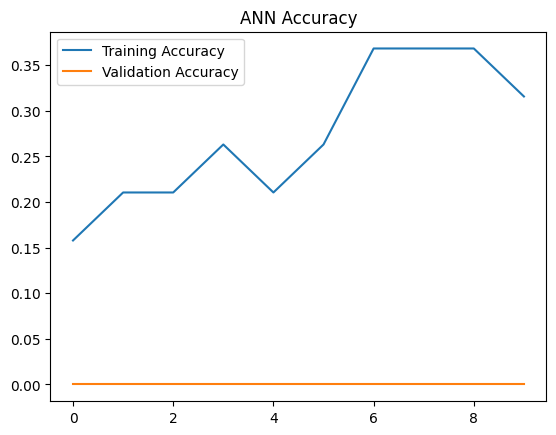

In [12]:
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("ANN Accuracy")
plt.show()


In [13]:
def predict_personality(text):
    cleaned = clean_text(text)
    vector = vectorizer.transform([cleaned]).toarray()
    return nb_model.predict(vector)[0]

predict_personality("I like to go out")


np.str_('Neurotic')